In [2]:
!pip install astroquery

In [3]:
from astroquery.gaia import Gaia

tables=Gaia.load_tables(only_names=True)
for table in tables:
  print(table.name)

INFO: Retrieving tables... [astroquery.utils.tap.core]
INFO: Parsing tables... [astroquery.utils.tap.core]
INFO: Done. [astroquery.utils.tap.core]
external.apassdr9
external.catwise2020
external.gaiadr2_astrophysical_parameters
external.gaiadr2_geometric_distance
external.gaiaedr3_distance
external.gaiaedr3_gcns_main_1
external.gaiaedr3_gcns_rejected_1
external.gaiaedr3_spurious
external.gaia_eso_survey
external.galex_ais
external.ravedr5_com
external.ravedr5_dr5
external.ravedr5_gra
external.ravedr5_on
external.ravedr6
external.sdssdr13_photoprimary
external.skymapperdr1_master
external.skymapperdr2_master
external.tmass_xsc
external.xgboost_table1
external.xgboost_table2
gaiadr1.aux_qso_icrf2_match
gaiadr1.ext_phot_zero_point
gaiadr1.allwise_best_neighbour
gaiadr1.allwise_neighbourhood
gaiadr1.gsc23_best_neighbour
gaiadr1.gsc23_neighbourhood
gaiadr1.ppmxl_best_neighbour
gaiadr1.ppmxl_neighbourhood
gaiadr1.sdss_dr9_best_neighbour
gaiadr1.sdss_dr9_neighbourhood
gaiadr1.tmass_best_neigh

In [4]:
meta=Gaia.load_table('gaiadr3.gold_sample_fgkm_stars')

for column in meta.columns:
  print(column.name)

source_id
teff_gspphot
logg_gspphot
mh_gspphot
ag_gspphot
ebpminrp_gspphot
alphafe_gspspec
teff_gspspec
logg_gspspec
mh_gspspec
radius_flame
lum_flame
mass_flame
age_flame
evolstage_flame
radius_flame_spec
lum_flame_spec
mass_flame_spec
age_flame_spec
evolstage_flame_spec
spectraltype_esphs


In [5]:
meta=Gaia.load_table('gaiaedr3.gaia_source')

for column in meta.columns:
  print(column.name)

solution_id
designation
source_id
random_index
ref_epoch
ra
ra_error
dec
dec_error
parallax
parallax_error
parallax_over_error
pm
pmra
pmra_error
pmdec
pmdec_error
ra_dec_corr
ra_parallax_corr
ra_pmra_corr
ra_pmdec_corr
dec_parallax_corr
dec_pmra_corr
dec_pmdec_corr
parallax_pmra_corr
parallax_pmdec_corr
pmra_pmdec_corr
astrometric_n_obs_al
astrometric_n_obs_ac
astrometric_n_good_obs_al
astrometric_n_bad_obs_al
astrometric_gof_al
astrometric_chi2_al
astrometric_excess_noise
astrometric_excess_noise_sig
astrometric_params_solved
astrometric_primary_flag
nu_eff_used_in_astrometry
pseudocolour
pseudocolour_error
ra_pseudocolour_corr
dec_pseudocolour_corr
parallax_pseudocolour_corr
pmra_pseudocolour_corr
pmdec_pseudocolour_corr
astrometric_matched_transits
visibility_periods_used
astrometric_sigma5d_max
matched_transits
new_matched_transits
matched_transits_removed
ipd_gof_harmonic_amplitude
ipd_gof_harmonic_phase
ipd_frac_multi_peak
ipd_frac_odd_win
ruwe
scan_direction_strength_k1
scan_di

In [6]:
query1="""SELECT
TOP 3000
source_id, ra, dec, parallax, phot_g_mean_mag, pmra, pmdec,radial_velocity,parallax,l,b,ruwe
FROM gaiadr3.gaia_source"""

job=Gaia.launch_job(query1)

results1=job.get_results()
results1

SOURCE_ID,ra,dec,parallax,phot_g_mean_mag,pmra,pmdec,radial_velocity,parallax_2,l,b,ruwe
,deg,deg,mas,mag,mas / yr,mas / yr,km / s,mas,deg,deg,
int64,float64,float64,float64,float32,float64,float64,float32,float64,float64,float64,float32
4096664056079223168,276.6666987900635,-17.710349017633607,-0.03239020029355901,18.46186,-1.3554436440927955,-5.0843311251761145,--,-0.03239020029355901,14.392818549607496,-2.708579636182443,1.0321479
4096664056079227264,276.6621039667661,-17.714395488613587,-0.27291170716227675,19.09726,-3.91753898501279,-6.428734558149388,--,-0.27291170716227675,14.38719659519891,-2.7065805622653913,1.0015815
4096664056079228672,276.6601908533672,-17.71561400654671,--,20.097742,--,--,--,--,14.385269307278131,-2.705531868956334,--
4096664056079228800,276.660526428294,-17.715784004047254,--,20.024694,--,--,--,--,14.38526708761438,-2.7058939153711012,--
4096664056079231488,276.65907676866897,-17.717201875102003,--,20.506678,--,--,--,--,14.383368150555217,-2.705328815271072,--
4096664056079231616,276.6587767676691,-17.71725908961809,0.5449696209754471,19.09166,-3.0019710333417837,-4.906579209212235,--,0.5449696209754471,14.383184632752842,-2.7051022422152293,1.0134598
4096664056079232384,276.6627409719403,-17.713339059538438,--,20.355804,--,--,--,--,14.388415339693173,-2.70662775060333,--
4096664056079232512,276.6627726865673,-17.713563368589497,0.08154420381501208,18.59073,-2.7391756058710284,-7.477541263146552,--,0.08154420381501208,14.388230467144714,-2.7067586154785475,0.9562686


In [7]:
query2="""SELECT
source_id, ra, dec, parallax, pmra, pmdec,radial_velocity,parallax,l,b
FROM gaiadr3.gaia_source
WHERE 1=CONTAINS(
  POINT(ra, dec),
  CIRCLE(53.33350, 79.58106, 0.5))
  AND abs(pmra_error/pmra)<0.10
  AND abs(pmdec_error/pmdec)<0.10
  AND pmra IS NOT NULL AND abs(pmra)>0
  AND pmdec IS NOT NULL AND abs(pmdec)>0"""

job2=Gaia.launch_job_async(query2)

results2=job2.get_results()
results2

INFO: Query finished. [astroquery.utils.tap.core]


SOURCE_ID,ra,dec,parallax,pmra,pmdec,radial_velocity,parallax_2,l,b
,deg,deg,mas,mas / yr,mas / yr,km / s,mas,deg,deg
int64,float64,float64,float64,float64,float64,float32,float64,float64,float64
555727781232151040,54.657527563076776,79.14631306297807,1.0157076889397796,-8.43761444725615,-3.822128490734344,--,1.0157076889397796,130.55220783220318,18.837879636194682
555728262266059648,54.9266465637514,79.17798730439794,2.5150372999814965,18.09470870311032,17.996749579545025,--,2.5150372999814965,130.57276362350726,18.894319872935803
555728326691403392,54.93396175218464,79.1918012722612,1.0854917949685663,9.854703652693784,-9.175032380750151,--,1.0854917949685663,130.56468655414395,18.905909345685206
555734133487194624,55.00280357008712,79.19613015221171,0.14317292777591933,1.0609536188333408,2.9286379022821443,--,0.14317292777591933,130.57238609320353,18.91741017450474
555734236565746176,55.05803769505075,79.21352815053841,0.49944609692735575,1.6025395811193146,-3.5997716577794314,-24.277937,0.49944609692735575,130.56924736362308,18.93743265700189
555734240862948480,55.05032834796843,79.21567440913167,0.9158340272244248,20.728292264252996,-8.767675177157987,--,0.9158340272244248,130.56663134157563,18.938184275634818
555734275222686976,55.118546711111854,79.20749047569736,1.2714122295952224,-1.9282803363132173,-3.2185387383030117,19.202646,1.2714122295952224,130.5825609856217,18.939918848823936
555734378301896832,55.14894498372173,79.24559748756859,0.426742745786619,-0.7073668828484552,1.0937316762208034,--,0.426742745786619,130.5617067944648,18.97301610407287


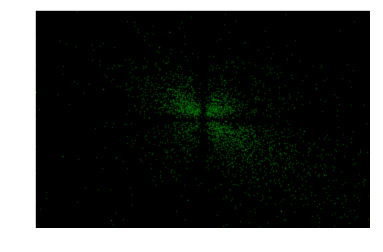

In [8]:
import matplotlib.pyplot as plt

plt.style.use('dark_background')

#plt.scatter(results1['pmra'],results1['pmdec'], alpha=0.2)
plt.xlim(-20,20)
plt.ylim(-20,20)



plt.scatter(results2['pmra'],results2['pmdec'], color='g', alpha=0.2,s=1)
plt.show()


(-323.9, 350.0)

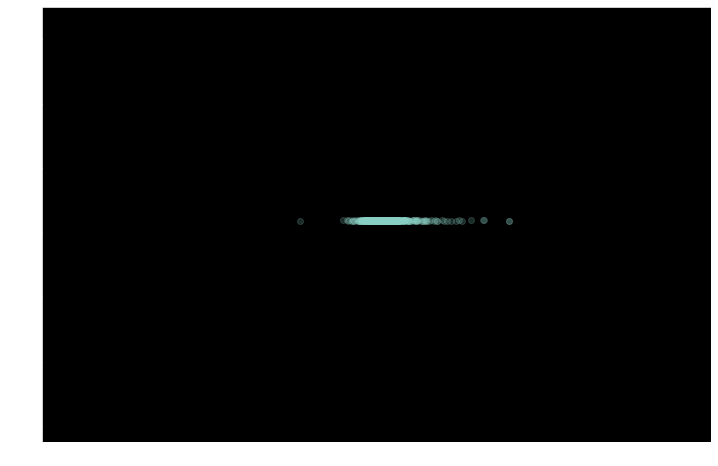

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.style.use('dark_background')

plt.scatter(results2['pmra'],results2['b'], alpha=0.2)
plt.xlim(-370,370)
plt.ylim(-323.9,350)


In [10]:
meta=Gaia.load_table('gaiadr3.astrophysical_parameters')

for column in meta.columns:
  print(column.name)

solution_id
source_id
classprob_dsc_combmod_quasar
classprob_dsc_combmod_galaxy
classprob_dsc_combmod_star
classprob_dsc_combmod_whitedwarf
classprob_dsc_combmod_binarystar
classprob_dsc_specmod_quasar
classprob_dsc_specmod_galaxy
classprob_dsc_specmod_star
classprob_dsc_specmod_whitedwarf
classprob_dsc_specmod_binarystar
classprob_dsc_allosmod_quasar
classprob_dsc_allosmod_galaxy
classprob_dsc_allosmod_star
teff_gspphot
teff_gspphot_lower
teff_gspphot_upper
logg_gspphot
logg_gspphot_lower
logg_gspphot_upper
mh_gspphot
mh_gspphot_lower
mh_gspphot_upper
distance_gspphot
distance_gspphot_lower
distance_gspphot_upper
azero_gspphot
azero_gspphot_lower
azero_gspphot_upper
ag_gspphot
ag_gspphot_lower
ag_gspphot_upper
abp_gspphot
abp_gspphot_lower
abp_gspphot_upper
arp_gspphot
arp_gspphot_lower
arp_gspphot_upper
ebpminrp_gspphot
ebpminrp_gspphot_lower
ebpminrp_gspphot_upper
mg_gspphot
mg_gspphot_lower
mg_gspphot_upper
radius_gspphot
radius_gspphot_lower
radius_gspphot_upper
logposterior_gspph

In [19]:
query = """

select fgkm.*, gaia.ra, gaia.dec, gaia.parallax, gaia.pmra, gaia.pmdec, 
gaia.pmra_error, gaia.pmdec_error, gaia.parallax_error,gaia.b,gaia.l,
gaia.pmra_pmdec_corr, gaia.parallax_pmra_corr, gaia.parallax_pmdec_corr,
gaia.radial_velocity, gaia.radial_velocity_error, gaia.rv_template_teff, gaia.grvs_mag,
gaia.phot_g_mean_mag, gaia.bp_rp, gaia.bp_g, gaia.g_rp, ap.abp_gspphot, ap.arp_gspphot,ap.spectraltype_esphs	
from gaiadr3.gaia_source as gaia

join gaiadr3.gold_sample_fgkm_stars as fgkm
using (source_id)
join gaiadr3.astrophysical_parameters as ap
using (source_id)
WHERE 1=CONTAINS(
  POINT(ra, dec),
  CIRCLE(153.33350, 79.58106,7))
  AND ap.spectraltype_esphs='K'
  AND abs(pmra_error/pmra)<0.10
  AND abs(pmdec_error/pmdec)<0.10
  AND pmra IS NOT NULL AND abs(pmra)>0
  AND pmdec IS NOT NULL AND abs(pmdec)>0

"""
'''WHERE 1=CONTAINS(
  POINT(ra, dec),
  CIRCLE(153.33350, 79.58106, 1.5))
  
  AND abs(pmra_error/pmra)<0.10
  AND abs(pmdec_error/pmdec)<0.10
  AND pmra IS NOT NULL AND abs(pmra)>0
  AND pmdec IS NOT NULL AND abs(pmdec)>0'''
# Execute the query
job = Gaia.launch_job(query)
results = job.get_results()
results
# Display the results
#print(results)

# Save the results to a file (e.g., CSV)
#results.write('gaia_rotation_velocity_data.csv', format='csv', overwrite=True)


SOURCE_ID,teff_gspphot,logg_gspphot,mh_gspphot,ag_gspphot,ebpminrp_gspphot,alphafe_gspspec,teff_gspspec,logg_gspspec,mh_gspspec,radius_flame,lum_flame,mass_flame,age_flame,evolstage_flame,radius_flame_spec,lum_flame_spec,mass_flame_spec,age_flame_spec,evolstage_flame_spec,spectraltype_esphs,ra,dec,parallax,pmra,pmdec,pmra_error,pmdec_error,parallax_error,b,l,pmra_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,radial_velocity,radial_velocity_error,rv_template_teff,grvs_mag,phot_g_mean_mag,bp_rp,bp_g,g_rp,abp_gspphot,arp_gspphot,spectraltype_esphs_2
,K,log(cm.s**-2),dex,mag,mag,dex,K,log(cm.s**-2),dex,solRad,solLum,solMass,Gyr,,solRad,solLum,solMass,Gyr,,,deg,deg,mas,mas / yr,mas / yr,mas / yr,mas / yr,mas,deg,deg,,,,km / s,km / s,K,mag,mag,mag,mag,mag,mag,mag,
int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,float32,float32,float32,float32,int32,object,float64,float64,float64,float64,float64,float32,float32,float32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,object
1719661238387101568,4540.7,4.5943,0.2165,0.1288,0.0675,--,--,--,--,0.708215,0.19261175,0.71459776,11.202895,262,--,--,--,--,--,K,180.70350980663858,81.67359505847826,1.8565853148774099,10.021124070306822,0.5387428439686295,0.026853893,0.026664933,0.022242917,35.251649014020344,125.0719020358015,-0.022087086,0.07711674,-0.095249064,--,--,--,--,15.443777,1.3775911,0.62111855,0.7564726,0.167,0.0995,K
1719669897041137280,4816.9766,4.5527,-0.0978,0.1134,0.0599,--,--,--,--,0.7400279,0.26588508,0.78224456,5.9749756,196,--,--,--,--,--,,180.96100111357174,81.86182681972542,1.1381982782118938,3.956961557010007,-1.5774877770004525,0.034656633,0.035204727,0.03084085,35.076689144269395,124.97574449141472,0.1119682,0.16961724,-0.20301718,--,--,--,--,16.012714,1.2047806,0.52999496,0.6747856,0.1453,0.0855,K
1719670206278783104,5151.813,4.6156,-0.3594,0.1653,0.0884,--,--,--,--,0.69589555,0.3060377,--,--,--,--,--,--,--,--,,180.58648098946136,81.87696229918699,1.5291757850814902,-30.645752963758266,22.2098779213777,0.024999676,0.025636801,0.021065637,35.0498925839153,125.03454804057976,0.1814218,0.0032639834,-0.2594359,--,--,--,--,15.2301035,1.0756798,0.4561863,0.6194935,0.2103,0.1219,K
1719670343717773952,4810.4707,4.6362,-0.4154,0.2052,0.1094,--,--,--,--,0.66941386,0.2148733,--,--,--,--,--,--,--,--,,180.31595289548585,81.83486950926151,1.6746488558056745,-29.708481516072876,1.188539807838382,0.027365236,0.027628018,0.024125788,35.08186598939592,125.09209024373509,0.07094649,0.06773275,-0.19085267,--,--,--,--,15.534598,1.2362776,0.5397825,0.69649506,0.2639,0.1545,K
1719672096064238720,4608.4883,4.5723,-0.0021,0.0916,0.0481,--,--,--,--,0.7359002,0.22007418,--,--,324,--,--,--,--,--,K,187.52373972242106,81.31091083714651,2.276565938831209,-12.9004120701853,12.511427695029981,0.023116754,0.021462245,0.017501542,35.77618441361533,123.92409652154613,0.080045335,0.009013588,-0.23294242,-9.980766,6.378599,4500.0,13.773727,14.79629,1.3029604,0.58259106,0.72036934,0.1182,0.0701,K
1719672783259006848,4547.166,4.5527,0.0,0.108,0.0568,--,--,--,--,0.7543534,0.21979564,--,--,348,--,--,--,--,--,K,186.8191841356066,81.3160279338136,1.3615615044605598,-22.884651377274114,1.2669369008820586,0.04208932,0.032851826,0.030329956,35.759529993090105,124.05377536542171,-0.046210732,0.25878876,-0.16814476,--,--,--,--,15.941288,1.3450909,0.60793114,0.7371597,0.1399,0.0831,K
1719674123288803712,4838.848,4.5999,-0.325,0.1538,0.0819,--,--,--,--,0.6899278,0.23544893,--,--,--,--,--,--,--,--,,187.544530110189,81.36840203117121,2.057050514601861,14.28740282387379,6.268272468790795,0.022253469,0.022229454,0.018127315,35.719310363737236,123.91304979044648,0.023346104,0.058530238,-0.1864392,--,--,--,--,14.937253,1.1994667,0.5178957,0.681571,0.1974,0.1156,K
1719675841275722624,4777.0903,4.5229,0.4172,0.1963,0.1024,--,--,--,--,0.8466127,0.34012395,--,--,--,--,--,--,--,--,,186.4363

(-20.0, 20.0)

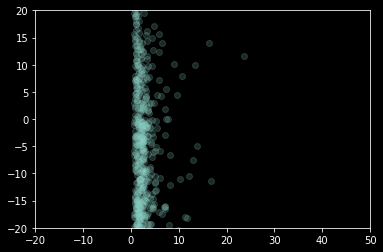

In [12]:
import matplotlib.pyplot as plt

plt.style.use('dark_background')

plt.scatter(results['parallax'],results['radial_velocity'], alpha=0.2)
plt.xlim(-20,50)
plt.ylim(-20,20)


(-200.0, 200.0)

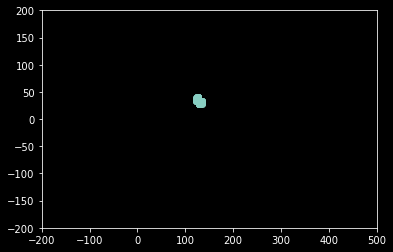

In [13]:
import matplotlib.pyplot as plt

plt.style.use('dark_background')

plt.scatter(results['l'],results['b'], alpha=0.2)
plt.xlim(-200,500)
plt.ylim(-200,200)


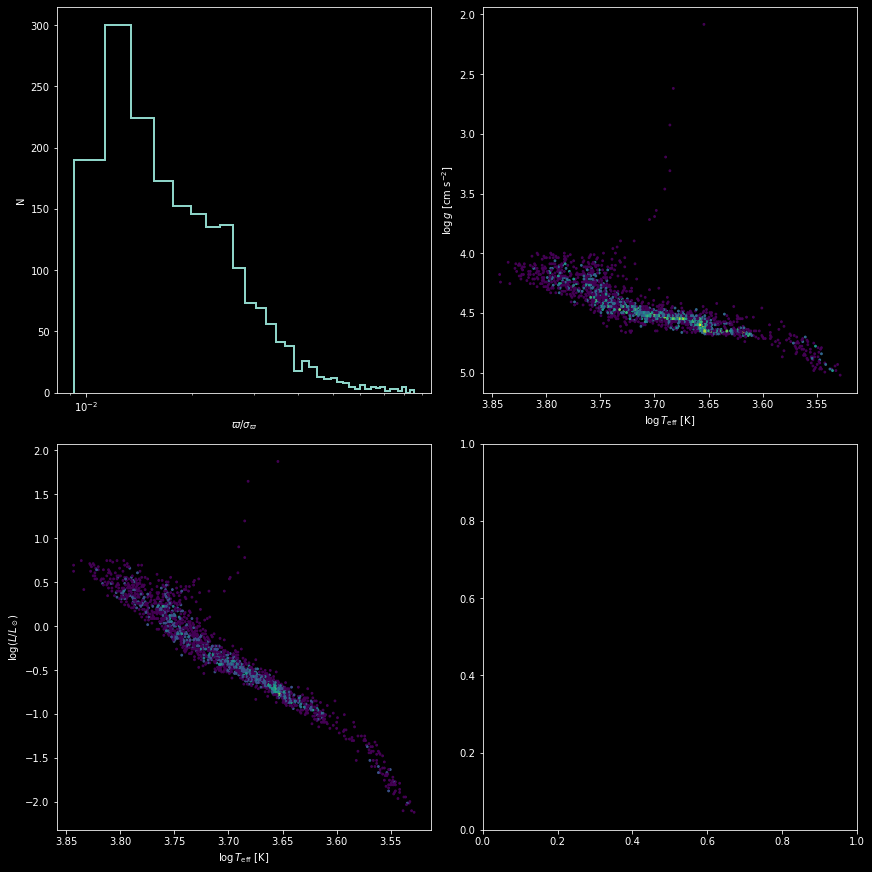

In [14]:
import numpy as np
fig=plt.figure(constrained_layout=True, figsize=(2*6,2*6))
from matplotlib.gridspec import GridSpec
gs = GridSpec(2, 2, figure=fig)

axplxsnr = fig.add_subplot(gs[0,0])


axplxsnr.hist(results['parallax_error'], bins='auto', histtype='step', lw=2)
axplxsnr.set_xscale('log')
axplxsnr.set_xlabel(r'$\varpi/\sigma_\varpi$')
axplxsnr.set_ylabel('N')

axkiel = fig.add_subplot(gs[0,1])

axkiel.hexbin(np.log10(results['teff_gspphot']), results['logg_gspphot'], bins='log', gridsize=200, mincnt=1)
axkiel.set_xlabel(r'$\log T_\mathrm{eff}$ [K]')
axkiel.set_ylabel(r'$\log g$ [cm s$^{-2}$]')
axkiel.invert_xaxis()
axkiel.invert_yaxis()
gridsize=200
axhrd = fig.add_subplot(gs[1,0])

axhrd.hexbin(np.log10(results['teff_gspphot']), np.log10(results['lum_flame']), bins='log', gridsize=200, mincnt=1)
axhrd.set_xlabel(r'$\log T_\mathrm{eff}$ [K]')
axhrd.set_ylabel(r'$\log(L/L_\odot)$')
axhrd.invert_xaxis()

axcmd = fig.add_subplot(gs[1,1])

'''axcmd.hexbin(results['bp_rp0_gspphot'], results['mg_abs0_gspphot'], bins='log', gridsize=200, mincnt=1)
axcmd.set_xlabel(r'$(G_\mathrm{BP}-G_\mathrm{RP})_0$')

\axcmd.set_ylabel(r'$M_{G,0}$')
axcmd.invert_yaxis()'''

plt.show()

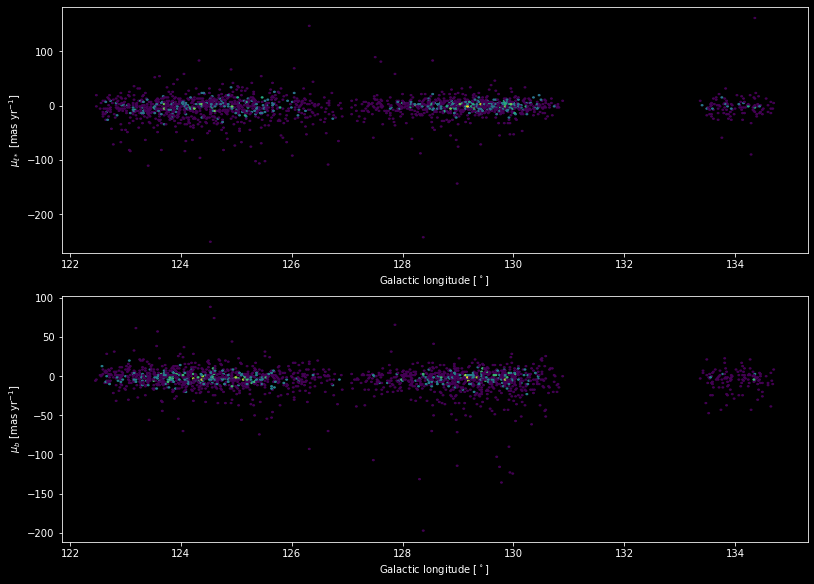

In [15]:
fig=plt.figure(constrained_layout=True, figsize=(0.8*14,0.8*10))

gs = GridSpec(2, 1, figure=fig)

ax_lmul = fig.add_subplot(gs[0,0])
im_lmul = ax_lmul.hexbin(results['l'], results['pmra'], 
                         gridsize=[360,100], mincnt=1, bins='log', )
ax_lmul.set_xlabel(r'Galactic longitude [$^\circ$]')
ax_lmul.set_ylabel(r'$\mu_{\ell*}$ [mas yr$^{-1}$]')


ax_lmub = fig.add_subplot(gs[1,0])
im_lmub = ax_lmub.hexbin(results['l'], results['pmdec'], 
                         gridsize=[360,100], mincnt=1, bins='log', )
ax_lmub.set_xlabel(r'Galactic longitude [$^\circ$]')
ax_lmub.set_ylabel(r'$\mu_b$ [mas yr$^{-1}$]')


plt.savefig('fgkmstar-pml-pmb-vs-galon.png')

plt.show()

In [16]:
from astropy import *
from astropy.units import au, km
plt.figure(figsize=(12, 8))



query = """

select fgkm.*, gaia.ra, gaia.dec, gaia.parallax, gaia.pmra, gaia.pmdec, 
gaia.pmra_error, gaia.pmdec_error, gaia.parallax_error,gaia.b,gaia.l,
gaia.pmra_pmdec_corr, gaia.parallax_pmra_corr, gaia.parallax_pmdec_corr,
gaia.radial_velocity, gaia.radial_velocity_error, gaia.rv_template_teff, gaia.grvs_mag,
gaia.phot_g_mean_mag, gaia.bp_rp, gaia.bp_g, gaia.g_rp, ap.abp_gspphot, ap.arp_gspphot
from gaiadr3.gaia_source as gaia

join gaiadr3.gold_sample_fgkm_stars as fgkm
using (source_id)
join gaiadr3.astrophysical_parameters as ap
using (source_id)
WHERE 1=CONTAINS(
  POINT(ra, dec),
  CIRCLE(53.33350, 80.58106, 10.75))
  AND abs(pmra_error/pmra)<0.10
  AND abs(pmdec_error/pmdec)<0.10
  AND pmra IS NOT NULL AND abs(pmra)>0
  AND pmdec IS NOT NULL AND abs(pmdec)>0

"""

# Execute the query
job = Gaia.launch_job(query)
results = job.get_results()
results
# Display the results


# Save the results to a file (e.g., CSV)
#results.write('gaia_rotation_velocity_data.csv', format='csv', overwrite=True)

# Create a quantity with the Rsun unit


# Print the value and unit of the quantity





KeyboardInterrupt: 

<Figure size 864x576 with 0 Axes>

     parallax    
-----------------
685732767.6002438
 596983182.361701
675269997.8983271
658196190.1825001
680727254.1208285
677374287.2527217
 676973154.323965
675992503.5298779
666583416.2900264
679157685.4267553
              ...
829129270.4666588
733000787.3296905
841285937.1798593
  747360447.01977
821877770.3192297
 788852626.765137
738972341.7526987
733912430.6435229
771329087.0502664
785036450.1233488
 722953846.858627
Length = 2000 rows
radial_velocity
     km / s    
---------------
      43.087334
     -20.965506
     -36.642757
     -14.834345
      -27.03744
      59.484745
             --
       8.307207
             --
             --
            ...
       -8.77855
     -57.332188
     -22.929628
     -55.495884
      11.377203
             --
     -27.752188
             --
             --
      12.044498
Length = 2000 rows


Text(0, 0.5, 'V_R(km/s)')

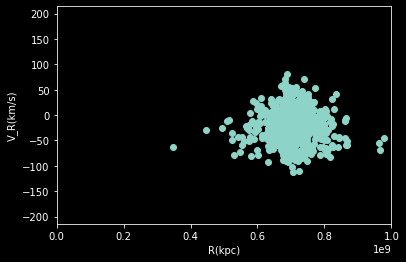

In [ ]:
Rsun = 6.96e8 
r=1.49597e8/results['parallax']
X=Rsun-(r*np.cos(results['l'])*np.cos(results['b']))
#X=Rsun-(r*np.mean(np.cos(results['l'])))
Y=(r*np.sin(results['l'])*np.cos(results['b']))
#Y=(r*np.mean(np.sin(results['l'])))
R=np.sqrt(X*X+Y*Y)
print(R)
print(results['radial_velocity'])
import matplotlib.pyplot as plt

plt.style.use('dark_background')

 
plt.scatter(R, ((results['radial_velocity']-results['radial_velocity_error'])), alpha=1)
plt.xlim(0,1e9) 
plt.xlabel('R(kpc)')

plt.ylim(-214.2546865,214.2546865)
plt.ylabel('V_R(km/s)')

45


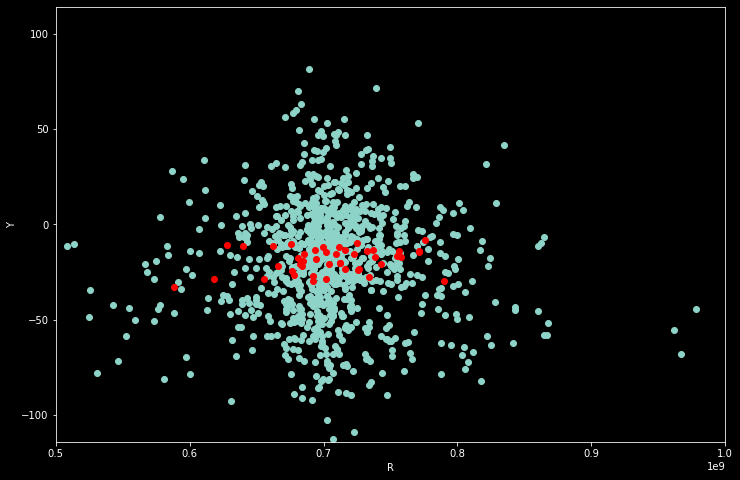

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
# Example data
y = results['radial_velocity']-results['radial_velocity_error']
x = R

# Define the segment size
segment_size = 45
# Calculate the number of segments
num_segments = int(np.ceil(len(x) / segment_size))
print(num_segments)
# Initialize arrays to store the averaged data
x_avg = np.zeros(num_segments)
y_avg = np.zeros(num_segments)

# Iterate over the segments
for i in range(num_segments):
    start_index = i * segment_size
    end_index = min((i + 1) * segment_size, len(x))
    segment_x = x[start_index:end_index]
    #print(segment_x)
    segment_y = y[start_index:end_index]
    x_avg[i] = np.mean(segment_x)
    y_avg[i] = np.mean(segment_y)

# Plot the data
plt.scatter(x, y)
plt.plot(x_avg, y_avg, color='red', linestyle='none', marker='o', label='Averaged Data')

# Set labels and limits
plt.xlabel('R')
plt.ylabel('Y')
plt.xlim(0.5e9,1e9)
plt.ylim(-114.2546865,114.2546865)

# Show the plot
plt.show()

In [ ]:
!pip install binsreg
!pip install seaborn

In [ ]:
import binsreg
import pandas as pd
def binscatter(**kwargs):
    # Estimate binsreg
    est = binsreg.binsreg(**kwargs)
    
    # Retrieve estimates
    df_est = pd.concat([d.dots for d in est.data_plot])
    df_est = df_est.rename(columns={'x': kwargs.get("x"), 'fit': kwargs.get("y")})
    
    # Add confidence intervals
    if "ci" in kwargs:
        df_est = pd.merge(df_est, pd.concat([d.ci for d in est.data_plot]))
        df_est = df_est.drop(columns=['x'])
        df_est['ci'] = df_est['ci_r'] - df_est['ci_l']
    
    # Rename groups
    if "by" in kwargs:
        df_est['group'] = df_est['group'].astype(data[kwargs.get("by")].dtype)
        df_est = df_est.rename(columns={'group': kwargs.get("by")})

    return df_est
x = R
y = results['radial_velocity']-results['radial_velocity_error']

data = pd.DataFrame({'x': x, 'y': y})
data

,x,y
0,6.857328e+08,42.692596
1,5.969832e+08,-23.699497
2,6.752700e+08,-40.085304
3,6.581962e+08,-16.877335
4,6.807273e+08,-29.931713
...,...,...
1995,7.389723e+08,NaN
1996,7.339124e+08,-28.399015
1997,7.713291e+08,NaN
1998,7.850365e+08,NaN


c:\Users\sutir\anaconda3\lib\site-packages\binsreg\binsreg.py:1520: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


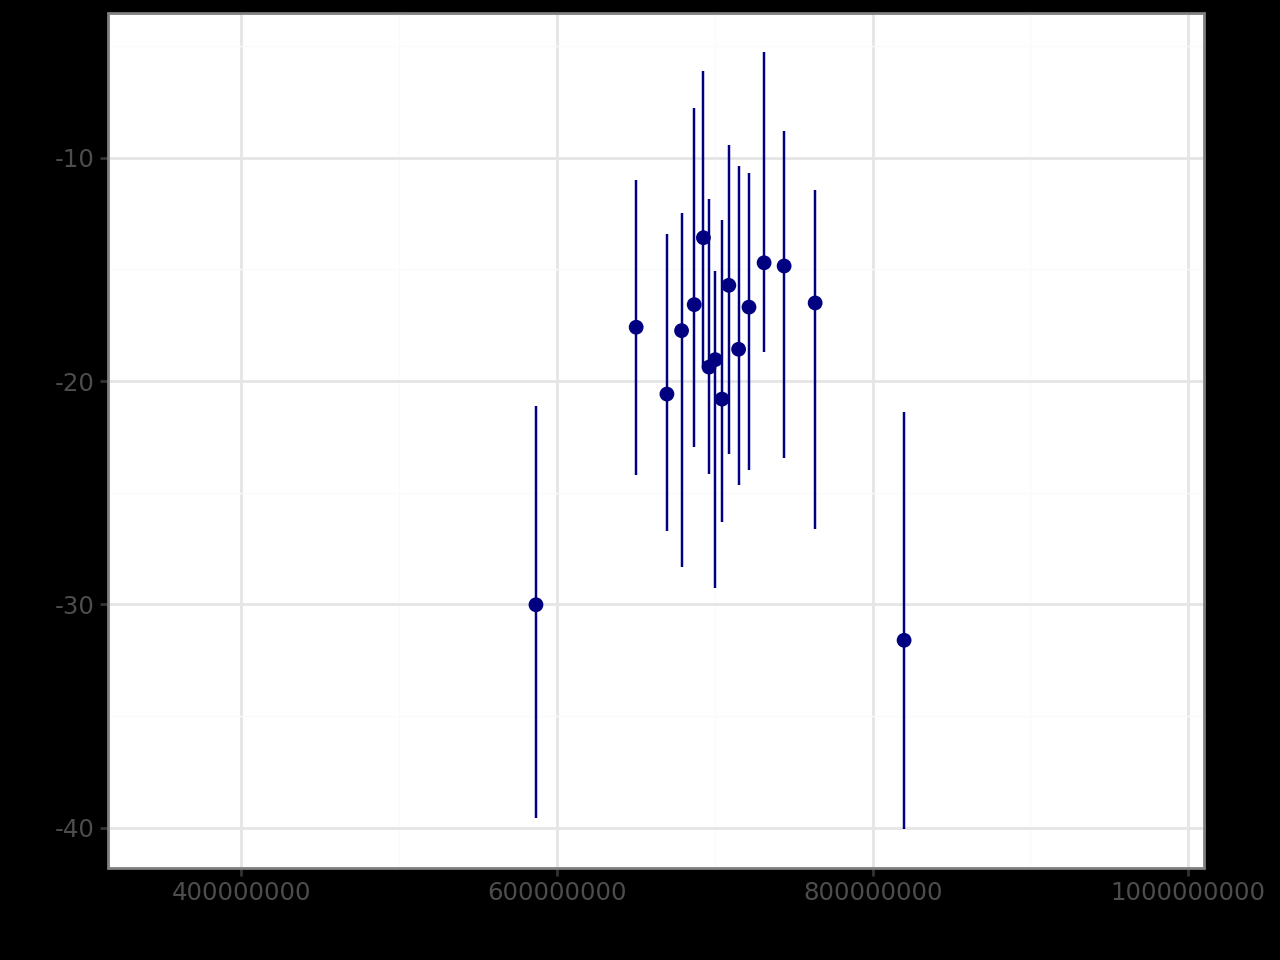

,group,bin,isknot,mid,y,ci_l,ci_r,ci
0,Full Sample,0,0,0,-30.011870,-39.536160,-21.131490,18.404670
1,Full Sample,1,0,0,-17.588509,-24.220700,-11.019690,13.201010
2,Full Sample,2,0,0,-20.580355,-26.716189,-13.401894,13.314296
3,Full Sample,3,0,0,-17.740791,-28.306667,-12.490053,15.816614
4,Full Sample,4,0,0,-16.576257,-22.956220,-7.765148,15.191072
5,Full Sample,5,0,0,-13.581236,-19.385403,-6.115435,13.269967
6,Full Sample,6,0,0,-19.374012,-24.168651,-11.867986,12.300665
7,Full Sample,7,0,0,-19.038870,-29.242868,-15.067401,14.175467
8,Full Sample,8,0,0,-20.805806,-26.290319,-12.779236,13.511083
9,Full Sample,9,0,0,-15.712350,-23.266401,-9.415275,13.851125


In [ ]:
df_est = binscatter(x='x', y='y', data=data, ci=(3,3))
df_est
#plt.show()

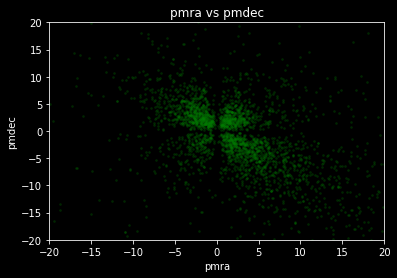

c:\Users\sutir\anaconda3\lib\site-packages\binsreg\binsreg.py:1520: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


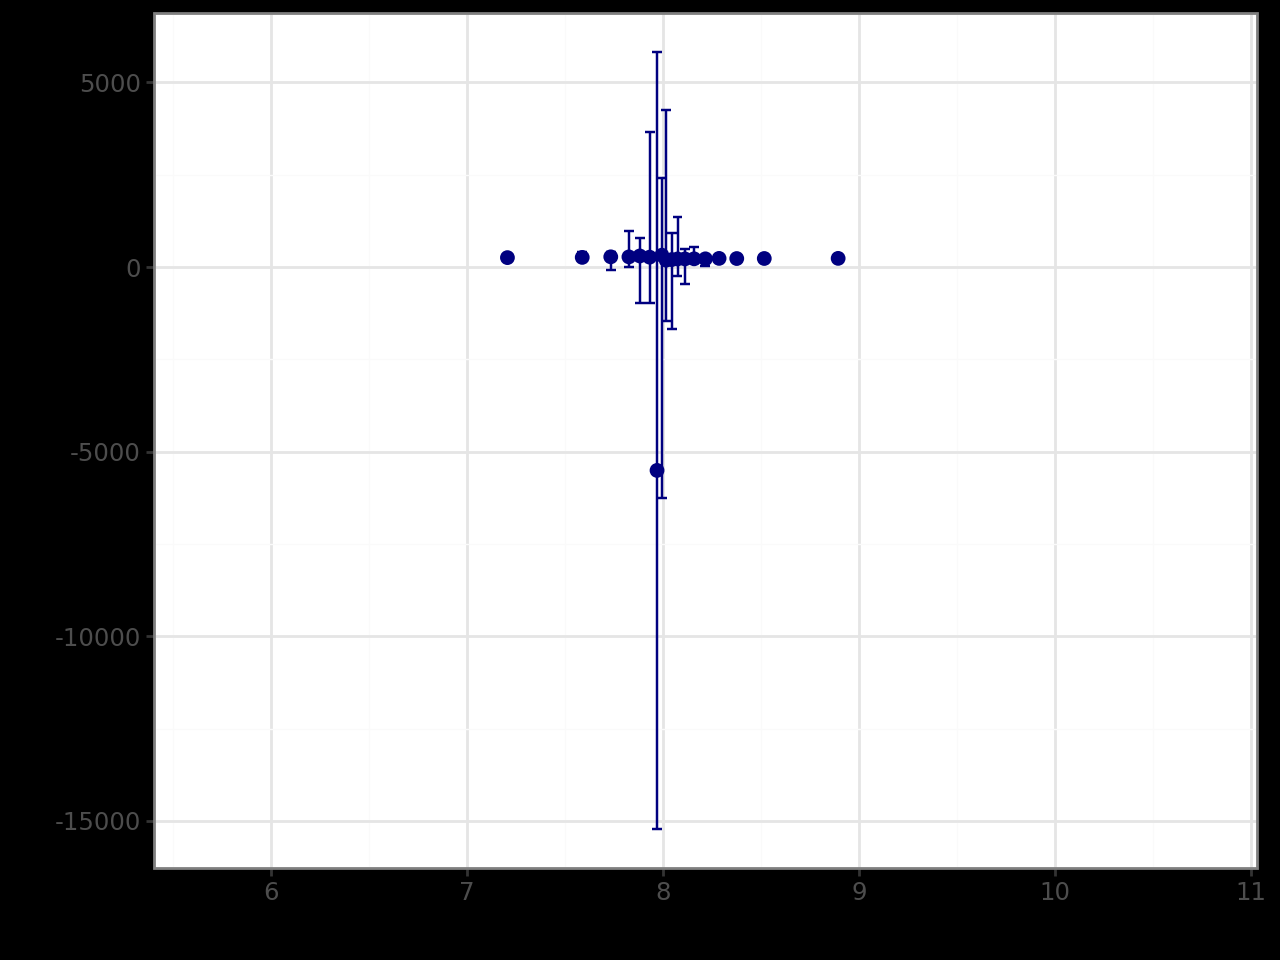

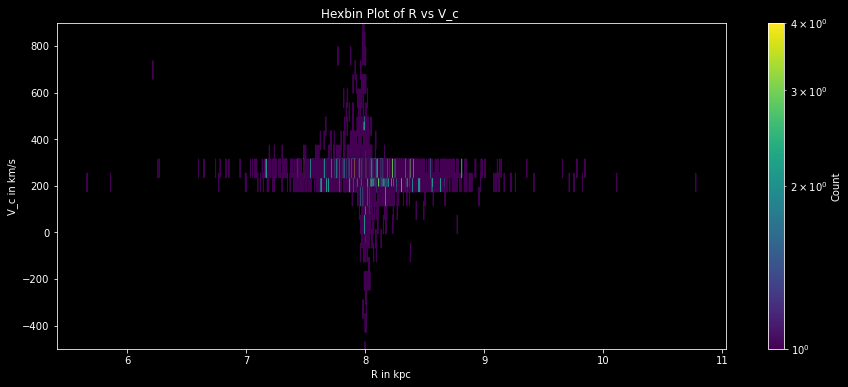

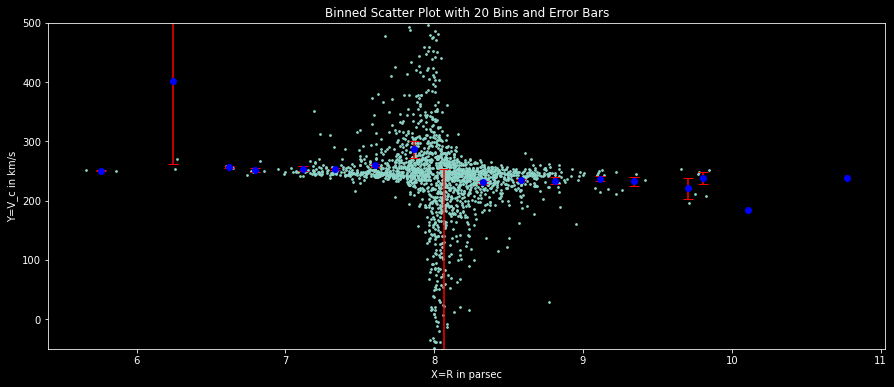

In [ ]:
U_sun, V_sun, W_sun =11.1, 245.8,7.2
dec_G, ra_G = 27, 193
C1 = (np.sin(dec_G)*np.cos(results['dec']) - np.cos(dec_G)*np.sin(results['dec'])*np.cos(results['ra']-ra_G))
C2 = (np.cos(dec_G)*np.sin(results['ra']-ra_G))
mul=(1/np.cos(results['b']))*((C1*results['pmra'])+(C2*results['pmdec']))
mub=(1/np.cos(results['b']))*((-C2*results['pmra'])+(C1*results['pmdec']))
v_r=results['radial_velocity']

Rsun = 8
r=1/results['parallax']
X=Rsun-(r*np.cos(results['l'])*np.cos(results['b']))
#X=Rsun-(r*np.mean(np.cos(results['l'])))
Y=(r*np.sin(results['l'])*np.cos(results['b']))
#Y=(r*np.mean(np.sin(results['l'])))
phi=np.arctan(Y/X)
R=np.sqrt(X*X+Y*Y)
v_l=mul*r


# Example data
y = (v_l-(U_sun*np.sin(results['l']))+(V_sun*np.cos(results['l']))) /(np.cos(phi+results['l']))
x = R


'''import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
# Define the segment size
segment_size = 50
# Calculate the number of segments
num_segments = int(np.ceil(len(x) / segment_size))
print(num_segments)
# Initialize arrays to store the averaged data
x_avg = np.zeros(num_segments)
y_avg = np.zeros(num_segments)

# Iterate over the segments
for i in range(num_segments):
    start_index = i * segment_size
    end_index = min((i + 1) * segment_size, len(x))
    segment_x = x[start_index:end_index]
    #print(segment_x)
    segment_y = y[start_index:end_index]
    x_avg[i] = np.mean(segment_x)
    y_avg[i] = np.mean(segment_y)

# Plot the data
plt.scatter(x, y)
plt.plot(x_avg, y_avg, color='red', linestyle='none', marker='o', label='Averaged Data')

# Set labels and limits
plt.xlabel('R is KPC')
plt.ylabel('V_C in km/s')
#plt.xlim(0.5e9,1e9)
plt.ylim(-500,500)

# Show the plot
plt.show()'''
import matplotlib.pyplot as plt

plt.style.use('dark_background')




#plt.figure(figsize=(12, 8))
plt.scatter(results2['pmra'],results2['pmdec'], s=3,color='g', alpha=0.2)
plt.title('pmra vs pmdec')
plt.xlabel('pmra')
plt.ylabel('pmdec')
plt.xlim(-20,20)
plt.ylim(-20,20)
plt.show()

#Binned 
data = pd.DataFrame({'x': x, 'y': y})
data
df_est = binscatter(x='x', y='y', data=data, ci=(3,3))
df_est
# Plot binned scatterplot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate sample data


data = pd.DataFrame({'x': x, 'y': y})

# Define the number of bins
n_bins = 20

# Create bins
data['bin'] = pd.cut(data['x'], bins=n_bins, labels=False)

# Calculate mean and standard error for each bin
binned_data = data.groupby('bin').agg({
    'x': 'mean', 
    'y': ['mean', 'sem']
}).reset_index()

# Flatten the MultiIndex columns
binned_data.columns = ['bin', 'x_mean', 'y_mean', 'y_sem']
#hexbin plot
plt.figure(figsize=(15, 6))
hb = plt.hexbin(x, y, gridsize=10000, bins='log', mincnt=1
                )
cb = plt.colorbar(hb, label='Count')

plt.xlabel('R in kpc')
plt.ylabel('V_c in km/s')
plt.ylim(-500,900)
plt.title('Hexbin Plot of R vs V_c ')
plt.show()
# Binned scatter plot with error bars
plt.figure(figsize=(15, 6))
plt.scatter(x,y,s=3)
plt.errorbar(binned_data['x_mean'], binned_data['y_mean'], yerr=binned_data['y_sem'], 
             fmt='o', ecolor='red', capsize=5, color='blue')
plt.title(f'Binned Scatter Plot with {n_bins} Bins and Error Bars')
plt.xlabel('X=R in parsec')
plt.ylim(-50,500)
plt.ylabel('Y=V_c in km/s')
plt.show()





<Figure size 864x576 with 0 Axes>

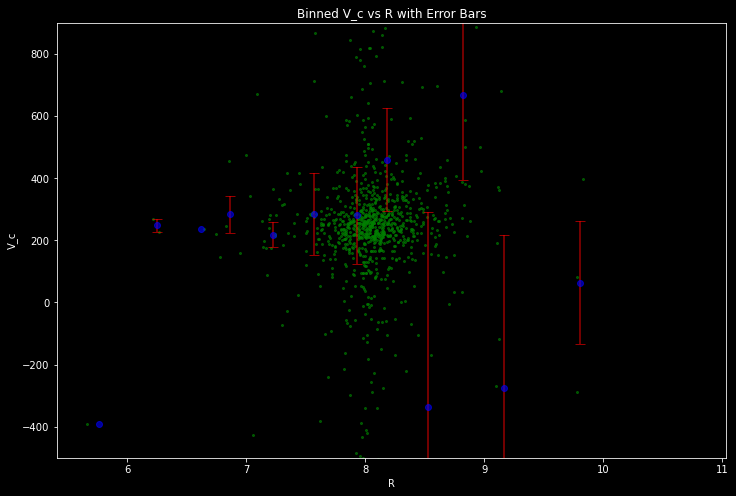

In [ ]:
V_lsr=results['radial_velocity']+(U_sun*np.cos(results['b'])*np.cos(results['l']))+(V_sun*np.cos(results['b'])*np.sin(results['l']))+(W_sun*np.sin(results['b']))
V_tang =np.abs((V_lsr/np.cos(results['b']))+V_sun*np.sin(results['l']))
V_c=(R/Rsun)*((V_lsr/(np.sin(results['l'])*np.cos(results['b']))))
plt.figure(figsize=(12, 8))


data = pd.DataFrame({'R': R, 'V_c': V_c})

# Define the number of bins
n_bins = 15

# Create bins
data['bin'] = pd.cut(data['R'], bins=n_bins, labels=False)

# Calculate mean and standard error for each bin
binned_data = data.groupby('bin').agg({
    'R': 'mean',
    'V_c': ['mean', 'sem']
}).reset_index()

# Flatten the MultiIndex columns
binned_data.columns = ['bin', 'R_mean', 'V_c_mean', 'V_c_sem']

# Binned scatter plot with error bars
plt.figure(figsize=(12, 8))
plt.scatter(R,V_c, s=4,color='g', alpha=0.6)
plt.title('pmra vs pmdec')
plt.xlabel('pmra')
plt.ylabel('pmdec')
plt.ylim(-500,900)
plt.errorbar(binned_data['R_mean'], binned_data['V_c_mean'], yerr=binned_data['V_c_sem'], fmt='o', ecolor='red', capsize=5, color='blue', alpha=0.6)
plt.title('Binned V_c vs R with Error Bars')
plt.xlabel('R')
plt.ylabel('V_c')
plt.ylim(-500, 900)
plt.show()